# Project Title : **Book Recommendation System**(Unsupervised Machine learning)
## Name : Kartik Nitturkar
## contrubution : Individual


## Github link: https://github.com/kartik496/Book_Recommendation_system


# **Introduction:**
## The objective of a Recommender System is to recommend relevant items for users, based on their preference. Preference and relevance are subjective, and they are generally inferred by items users have consumed previously

## Why Recommendation system?
### A recommendation system is one of the top applications of data science. Every consumer Internet company requires a recommendation system like Netflix, Youtube, a news feed, etc. What you want to show out of a huge range of items is a recommendation system.
### In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).
### Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors.

## **Dataset Description**
### Books – first are about books which contain all the information related to books like an author, title, publication year, etc.
### Users – The second file contains registered user’s information like user id, location.
### ratings –  Ratings contain information like which user has given how much rating to which book.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns # for visualization
import random # to get random sample or data
import matplotlib.pyplot as plt
import scipy
import math
from sklearn.metrics.pairwise import cosine_similarity # importing consine_similarity score from metrics module of seaborn lib.
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors # importing NearestNeighbors form neighbors module.
from sklearn.model_selection import train_test_split # importing train_test_split from model_preprocessing from sklearn module.
from scipy.sparse.linalg import svds
from sklearn import preprocessing # for preprocessing
# Ignoring stopwords (words with no semantics) from English
import nltk
from nltk.corpus import stopwords # for handling stopwords in dataset.
from sklearn.preprocessing import normalize
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer # importing TfidfVectorizer from feature extraction

# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore') # for ignoring the warnings

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading our data sets
Books = pd.read_csv('/content/drive/MyDrive/Almabetter_unsupervisedLearning_capstone /Books.csv')
Ratings = pd.read_csv('/content/drive/MyDrive/Almabetter_unsupervisedLearning_capstone /Ratings.csv')
Users = pd.read_csv('/content/drive/MyDrive/Almabetter_unsupervisedLearning_capstone /Users.csv')

In [ ]:
Books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
Ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
Users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
Books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
Books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [ ]:
Ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
Ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [ ]:
Users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
Users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [ ]:
print('Shape of the books:',Books.shape)
print('Shape of the Ratings:',Ratings.shape)
print('Shape of the Users:',Users.shape)


Shape of the books: (271360, 8)
Shape of the Ratings: (1149780, 3)
Shape of the Users: (278858, 3)


In [ ]:
Books.duplicated().sum()
Ratings.duplicated().sum()
Users.duplicated().sum()

0

In [ ]:
# Function check unique values for each variable.
def unique_values(dataset):
  list_unique_values = [dataset[col].nunique() for col in dataset.columns]
  list_cols = dataset.columns.tolist()
  data = list(zip(list_cols,list_unique_values))
  df = pd.DataFrame(data,columns = ['Column','No of Unique Values'])
  return df

In [ ]:
unique_values(Books)

,Column,No of Unique Values
0,ISBN,271360
1,Book-Title,242135
2,Book-Author,102023
3,Year-Of-Publication,202
4,Publisher,16807
5,Image-URL-S,271044
6,Image-URL-M,271044
7,Image-URL-L,271041


In [ ]:
unique_values(Ratings)

,Column,No of Unique Values
0,User-ID,105283
1,ISBN,340556
2,Book-Rating,11


In [ ]:
unique_values(Users)

,Column,No of Unique Values
0,User-ID,278858
1,Location,57339
2,Age,165


# **Preprocessing data** and **Cleaning**

In [ ]:
# Merging the data frames
merged_df1 = pd.merge(Users,Ratings,on='User-ID')
merged_df2 = pd.merge(merged_df1,Books,on='ISBN')

In [ ]:
merged_df2.head()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,2,"stockton, california, usa",18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,8,"timmins, ontario, canada",NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,11400,"ottawa, ontario, canada",49.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,11676,"n/a, n/a, n/a",NaN,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
4,41385,"sudbury, ontario, canada",NaN,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [ ]:
merged_df2.shape

(1031136, 12)

In [ ]:
merged_df2.duplicated().sum()

0

In [ ]:
#I'm dropping the three columns as those are not much importent for the model
merged_df2.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True) # using drop method of dataframe object

In [ ]:
merged_df2['Country'] = merged_df2['Location'].astype(str).apply(lambda x:x.split(',')[-1])
# Drop the location column
merged_df2.drop('Location',axis=1,inplace=True) # inplace =True means we are changing original datafram itself

In [ ]:
merged_df2['Country'].unique()

array([' usa', ' canada', ' n/a', '', ' malaysia', ' spain',
       ' new zealand', ' finland', ' united kingdom', ' portugal',
       ' brazil', ' germany', ' austria', ' italy', ' netherlands',
       ' australia', ' france', ' costa rica', ' poland', ' us', ' iran',
       ' aruba', ' india', ' pakistan', ' taiwan', ' singapore',
       ' argentina', ' romania', ' greece', ' ireland', ' philippines',
       ' belgium', ' philippines"', ' mexico', ' south africa',
       ' burkina faso', ' croatia', ' switzerland', ' denmark', ' rwanda',
       ' yugoslavia', ' turkey', ' china', ' japan', ' qatar', ' latvia',
       ' sweden', ' kuwait', ' indonesia', ' nepal', ' peru',
       ' venezuela', ' south korea"', ' hong kong', ' united states',
       ' slovakia', ' norway', ' dominican republic',
       ' bosnia and herzegovina', ' south korea', ' macedonia', ' kenya',
       ' mauritius', ' catalonia', ' nigeria', ' madagascar', ' israel',
       ' oman', ' egypt', ' lithuania', ' guate

In [ ]:
# fix the unknown and missing values
merged_df2['Country'] = merged_df2['Country'].replace(' ','Other').replace('NA','Other')

In [ ]:
# A function to get the missing values count and it's percentage
def missing_values(df):
   miss = df.isnull().sum() # finding the missing values.
   per = df.isnull().mean() # finding mean/ Average of missing values.
   df = pd.concat([miss,per*100],keys = ['Missing_Values','Percentage'], axis = 1) # concatenating both of them using concat method of pandas module.
   return df # returning dataframe

In [ ]:
missing_values(merged_df2)

,Missing_Values,Percentage
User-ID,0,0.000000
Age,277835,26.944554
ISBN,0,0.000000
Book-Rating,0,0.000000
Book-Title,0,0.000000
Book-Author,1,0.000097
Year-Of-Publication,0,0.000000
Publisher,2,0.000194
Country,0,0.000000


In [ ]:
merged_df2.loc[(merged_df2['Publisher'].isnull())]

,User-ID,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Country
857163,98391,52.0,193169656X,9,Tyrant Moon,Elaine Corvidae,2002,NaN,usa
857174,98391,52.0,1931696993,9,Finders Keepers,Linnea Sinclair,2001,NaN,usa


In [ ]:
merged_df2.loc[(merged_df2['Book-Author'].isnull())]

,User-ID,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Country
857604,98647,26.0,9627982032,8,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,malaysia


In [ ]:
merged_df2[['Book-Author','Publisher']].dropna(inplace = True) # dropping records where we have missing values in Book_Author and Publisher

#**EDA Performance**

<Axes: >

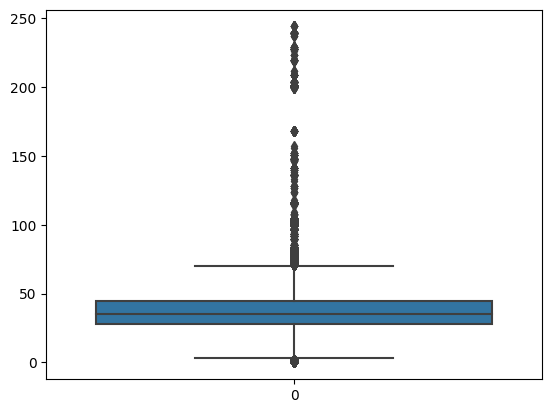

In [ ]:
sns.boxplot(merged_df2['Age'])

In [127]:
# Outlier data became NaN
merged_df2.loc[(merged_df2.Age > 100) | (merged_df2.Age < 5), 'Age'] = np.nan

In [136]:
# Null values in age column
nulls = sum(merged_df2['Age'].isnull()) # checking the missing value in Age
print(f'There are {nulls} null value present in the data')

There are 0 null value present in the data


In [132]:
# Imputing null values
median = merged_df2['Age'].median() # finding the median of Age column
std = merged_df2['Age'].std() # Standard Deviation of Age
# Fill invalid and missing ages with random normal distributed numbers
random_age = np.random.randint(median - std, median + std, size = nulls)
age = merged_df2['Age'].copy()
age[pd.isnull(age)] = random_age
merged_df2['Age'] = age
merged_df2['Age'] = merged_df2['Age'].astype(int) # converting it into integer



In [133]:
missing_values(merged_df2)

,Missing_Values,Percentage
User-ID,0,0.000000
Age,0,0.000000
ISBN,0,0.000000
Book-Rating,0,0.000000
Book-Title,0,0.000000
Book-Author,1,0.000261
Year-Of-Publication,0,0.000000
Publisher,2,0.000521
Country,0,0.000000
Avg-Ratings,0,0.000000


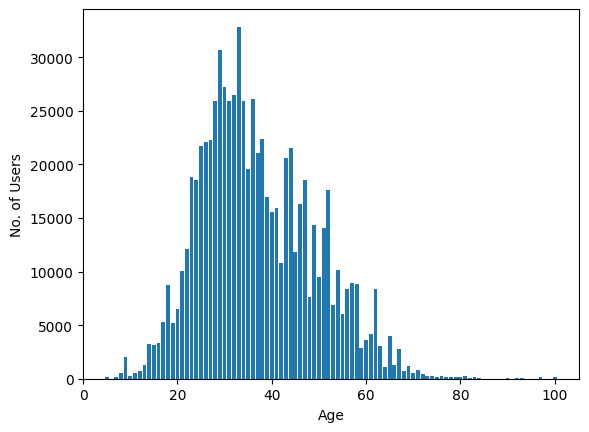

In [ ]:
# Distribution of age after removing outliers and fixing missing values
u = merged_df2.Age.value_counts().sort_index() # counting the values of Age
plt.bar(u.index, u.values) # barplot
plt.xlabel('Age')
plt.ylabel('No. of Users')
plt.xlim(xmin = 0)
plt.show()


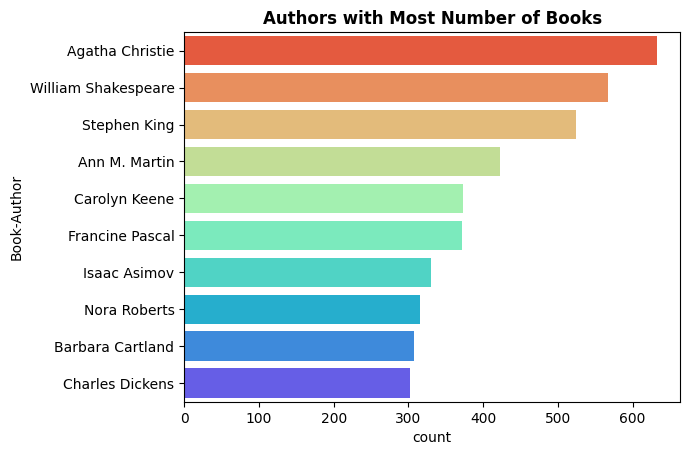

In [ ]:
# ploatting the count of top 10 books using coutplot.
sns.countplot(y='Book-Author',data=Books,order=pd.value_counts(Books['Book-Author']).iloc[:10].index, palette='rainbow_r')
plt.title("Authors with Most Number of Books", fontweight='bold');

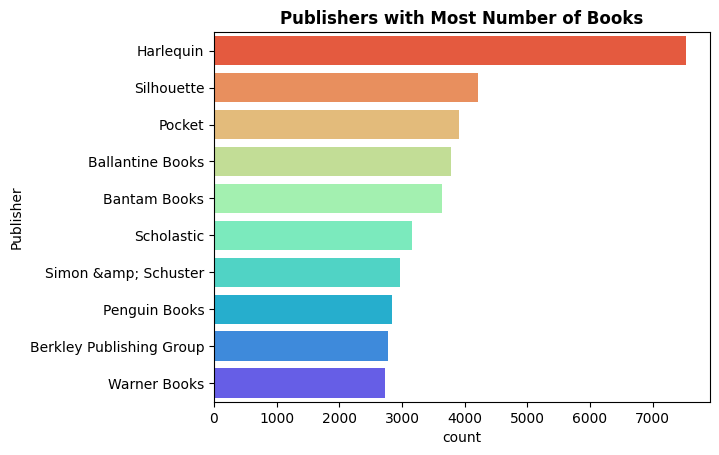

In [ ]:
# ploatting the count of top 10 books using coutplot.
sns.countplot(y='Publisher',data=Books,order=pd.value_counts(Books['Publisher']).iloc[:10].index, palette='rainbow_r')
plt.title("Publishers with Most Number of Books", fontweight='bold');

Text(0.5, 1.0, 'Countries with Most Number of Books')

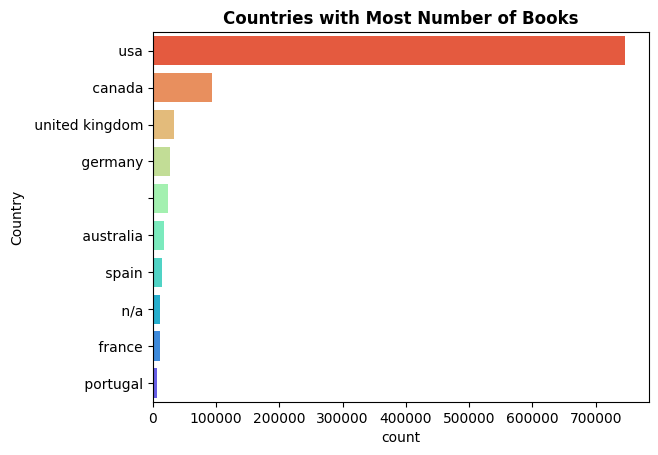

In [ ]:
# Pie Graph of top five countires.
sns.countplot(y='Country',data=merged_df2,order=pd.value_counts(merged_df2['Country']).iloc[:10].index, palette='rainbow_r')
plt.title("Countries with Most Number of Books", fontweight='bold')

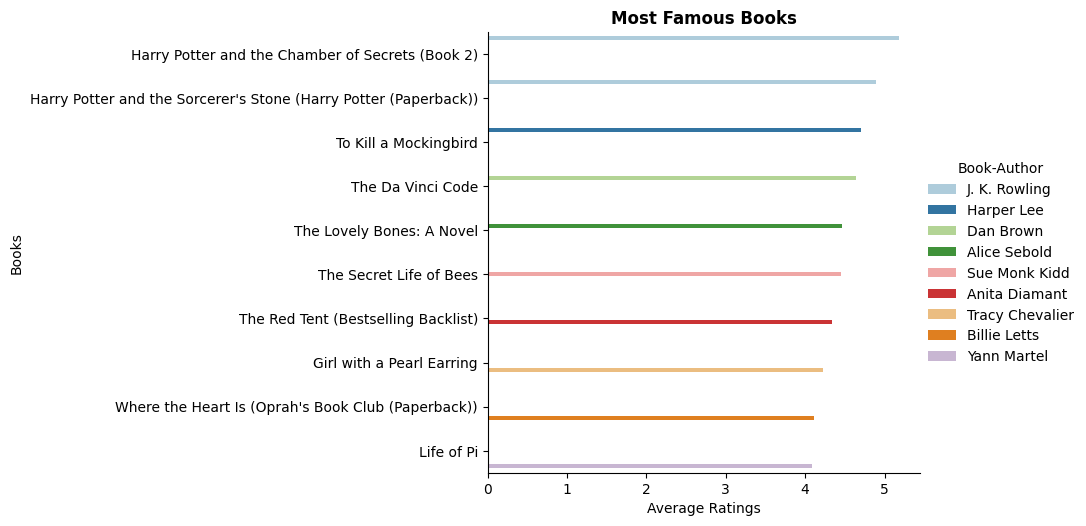

In [ ]:
book_rating = merged_df2.groupby(['Book-Title','Book-Author'])['Book-Rating'].agg(['count','mean']).sort_values(by='mean', ascending=False).reset_index()
sns.catplot(x='mean', y='Book-Title', data=book_rating[book_rating['count']>500][:10], kind='bar', palette = 'Paired',hue='Book-Author' )
plt.xlabel('Average Ratings')
plt.ylabel('Books')
plt.title('Most Famous Books', fontweight='bold');

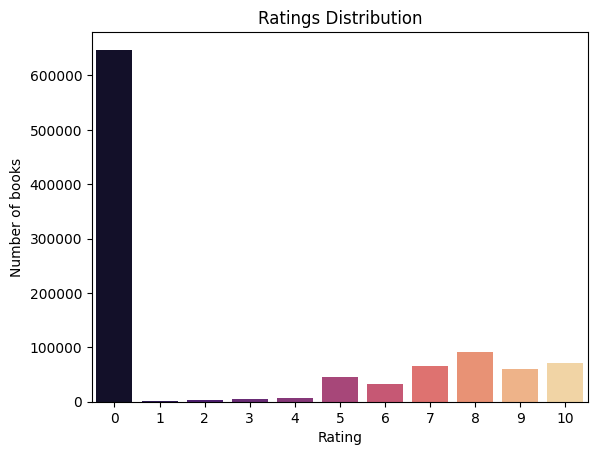

In [ ]:
# barplot of book_rating with respect to its index
sns.barplot(x = merged_df2['Book-Rating'].value_counts().index,y = merged_df2['Book-Rating'].value_counts().values,
            palette = 'magma').set(title="Ratings Distribution", xlabel = "Rating",ylabel = 'Number of books')
plt.show()

In [ ]:
# Create column average ratings using groupby on book title because some of the books have same book title but different isbn number.
merged_df2['Avg-Ratings'] =  merged_df2.groupby('Book-Title')['Book-Rating'].transform('mean')
# Create column number of ratings
merged_df2['No-Of-Ratings'] = merged_df2.groupby('Book-Title')['Book-Rating'].transform('count')
# Create new data frame popular_df
popular_df = merged_df2[['Book-Title','Avg-Ratings','No-Of-Ratings']]

In [ ]:
popular_df

,Book-Title,Avg-Ratings,No-Of-Ratings
0,Classical Mythology,3.500000,2
1,Clara Callan,4.928571,14
2,Clara Callan,4.928571,14
3,Clara Callan,4.928571,14
4,Clara Callan,4.928571,14
...,...,...,...
1031131,As Hogan Said . . . : The 389 Best Things Anyo...,0.000000,1
1031132,All Elevations Unknown: An Adventure in the He...,5.000000,1
1031133,Why stop?: A guide to Texas historical roadsid...,7.000000,1
1031134,The Are You Being Served? Stories: 'Camping In...,7.000000,1


In [ ]:
popular_df.duplicated().sum()

790065

In [ ]:
# Drop duplicate books
popular_df.drop_duplicates('Book-Title',inplace=True)

In [ ]:
popular_df.head()

,Book-Title,Avg-Ratings,No-Of-Ratings
0,Classical Mythology,3.500000,2
1,Clara Callan,4.928571,14
15,Decision in Normandy,5.000000,3
18,Flu: The Story of the Great Influenza Pandemic...,4.272727,11
29,The Mummies of Urumchi,0.000000,1


In [ ]:
# Applying a constraint of number of ratings greater tha 200 to only keep the most popular books
popular_df = popular_df[popular_df['No-Of-Ratings']>200].sort_values('Avg-Ratings',ascending=False)

In [ ]:
# Top 10 recommended books
popular_df.head(10)

,Book-Title,Avg-Ratings,No-Of-Ratings
32601,Harry Potter and the Prisoner of Azkaban (Book 3),5.852804,428
33024,Harry Potter and the Goblet of Fire (Book 4),5.824289,387
37538,Harry Potter and the Sorcerer's Stone (Book 1),5.737410,278
33218,Harry Potter and the Order of the Phoenix (Boo...,5.501441,347
72126,Ender's Game (Ender Wiggins Saga (Paperback)),5.409639,249
32080,Harry Potter and the Chamber of Secrets (Book 2),5.183453,556
167539,The Hobbit : The Enchanting Prelude to The Lor...,5.007117,281
37807,The Fellowship of the Ring (The Lord of the Ri...,4.948370,368
125266,Harry Potter and the Sorcerer's Stone (Harry P...,4.895652,575
37870,"The Two Towers (The Lord of the Rings, Part 2)",4.880769,260


#**Recommendation System**
### A recommendation engine is a class of machine learning which offers relevant suggestions to the custome for example, Google knows what news you will read, Youtube knows what type of videos you will watch based on your search history, watch history.

##**Collaborative-based filtering**
### Collaborative based filtering recommender systems are based on past interactions of users and rating of the books.  In simple words here, we try to search for the book look-alike customers and offer products based on what his or her lookalike has chosen. Let us understand with an example. X and Y are two similar users and X user has Read A, B, and C book. And Y user has Read B, C, and D book then recommend will be A book to Y user and D book to X user.

Extra knowledge:
Youtube has shifted its recommendation system from content-based to Collaborative based filtering technique. If you have experienced sometimes there are also videos which not at all related to your history but then also it recommends it because the other person similar to you has watched it.

In [ ]:
# Checking the shape of merged dataframe
merged_df2.shape

(1031136, 11)

In [ ]:
x = merged_df2.groupby('User-ID').count()['Book-Rating'] > 200

In [ ]:
x[x]

User-ID
254       True
2276      True
2766      True
2977      True
3363      True
          ... 
274308    True
275970    True
277427    True
277639    True
278418    True
Name: Book-Rating, Length: 811, dtype: bool

In [ ]:
merged_df2 = merged_df2[merged_df2['Book-Rating']!=0] # taking explitcit rating_df means Taking where book rating is not equal to zero

## **If we take all the books and all the users for modeling, Don’t you think will it create a problem?**
## So what we have to do is we have to decrease the number of users and books because we cannot consider a user who has only registered on the website or has only read one or two books. On such a user, we cannot rely to recommend books to others because we have to extract knowledge from data. So what we will limit this number and we will take a user who has rated at least 200 books and also we will limit books and we will take only those books which have received at least 50 ratings from a user.

In [ ]:
# Applying constraint on user id using it's count
x = merged_df2.groupby('User-ID').count()['Book-Rating'] > 200
filtered_df = merged_df2[merged_df2['User-ID'].isin(x[x].index)]

In [ ]:
# Applying constraint on number of rartings
y = merged_df2.groupby('Book-Title').count()['Book-Rating'] >50
filtered_df = filtered_df[filtered_df['Book-Title'].isin(y[y].index)]

In [ ]:
filtered_df.shape

(4564, 11)

In [ ]:
filtered_df.head() # head of filtered dataframe

,User-ID,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Country,Avg-Ratings,No-Of-Ratings
31,11676,NaN,0399135782,9,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,n/a,2.996785,311
34,46398,37.0,0399135782,9,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,usa,2.996785,311
54,230522,52.0,0399135782,7,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,usa,2.996785,311
106,7346,49.0,0440234743,9,The Testament,John Grisham,1999,Dell,usa,3.179903,617
112,11676,NaN,0440234743,9,The Testament,John Grisham,1999,Dell,n/a,3.179903,617


In [ ]:
# From a user item matrix with values as ratings
p_table = filtered_df.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating').fillna(0) # filling nan with 0

In [ ]:
p_table

User-ID,4385,6251,6575,7346,11676,13552,16634,16795,23768,23872,...,257204,258185,261829,262998,264321,265115,265889,269566,270713,274061
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,0.0,0.0,8.0,10.000000,0.0,0.0,8.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,9.000000,0.0,0.0,9.0,0.0,0.0,...,0.0,9.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,7.500000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,8.333333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Wizard and Glass (The Dark Tower, Book 4)",0.0,0.0,0.0,0.0,10.000000,0.0,9.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wuthering Heights,0.0,0.0,0.0,0.0,10.000000,0.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Year of Wonders,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Create an object of cosine similarity
similarity_scores = cosine_similarity(p_table)

In [ ]:
# Matrix size
similarity_scores.shape

(624, 624)

In [ ]:
for i,j in enumerate([1,2,3]):
  print(f"Index : {i} value {j}")

Index : 0 value 1
Index : 1 value 2
Index : 2 value 3


In [ ]:
def recommend_book(book_name):
  """
  Description: It takes a book name and return data frame with similarity score
  Function: recommend_book
  Argument: book_name
  Return type : dataframe
  """
  index = np.where(p_table.index == book_name)[0][0] # finding index of same book
  similar_books = sorted(list(enumerate(similarity_scores[index])), key = lambda x:x[1], reverse = True)[1:6] # creating the list tuple of index with respect to similarity score

  # print(similar_books)

  print("\n----------------Recommended books-----------------\n")
  for i in similar_books:
    print(p_table.index[i[0]])
  print("\n.....................................................\n")
  return find_similarity_score(similar_books,p_table)

In [ ]:
def find_similarity_score(similarity_scores,p_table):
  """
  Description: It takes similarity_Score and pivot table and return dataframe.
  function : find_similarity_Score
  Output : dataframe
  Argument  similarity_score and pivot table
  """
  list_book = []
  list_sim = []
  for i in similarity_scores:
    index_ = i[0]
    sim_ = i[1]
    list_sim.append(sim_)
    # list_book.append(pivot_table[pivot_table.index == index_]['Book-Title'][index_])
    list_book.append(p_table.iloc[index_,:].name)

    df = pd.DataFrame(list(zip(list_book, list_sim)),
               columns =['Book', 'Similarity'])
  # df =pd.DataFrame([list_book, list_sim], columns = ["Book",'Similarity_Score'])
  return df

In [ ]:
# calling recommend_book and recommend the books with their similarity score
recommend_book('Harry Potter and the Prisoner of Azkaban (Book 3)')


----------------Recommended books-----------------

Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Order of the Phoenix (Book 5)

.....................................................



,Book,Similarity
0,Harry Potter and the Goblet of Fire (Book 4),0.765105
1,Harry Potter and the Chamber of Secrets (Book 2),0.638622
2,Harry Potter and the Sorcerer's Stone (Harry P...,0.519981
3,Harry Potter and the Sorcerer's Stone (Book 1),0.507874
4,Harry Potter and the Order of the Phoenix (Boo...,0.494995


In [ ]:
# Create an object of csr matrix
df_matrix = csr_matrix(p_table.values)

In [ ]:
# Building a KNN model with Cosine Similarity as the target metric for calculating the distances.
knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute', n_neighbors=5)
knn.fit(p_table) # training knn

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
recommend("Harry Potter and the Sorcerer's Stone (Book 1)")

,Movie,Distance
0,Harry Potter and the Chamber of Secrets (Book 2),0.000000
1,Harry Potter and the Prisoner of Azkaban (Book 3),0.472237
2,Harry Potter and the Goblet of Fire (Book 4),0.492126
3,Catering to Nobody,0.520004
4,Harry Potter and the Sorcerer's Stone (Harry P...,0.570242
5,The Shelters of Stone (Earth's Children Series...,0.586389
6,Four Blondes,0.608873
7,Tara Road,0.628341
8,Carolina Moon,0.636226
9,Scarlet Feather,0.645166


## Recommender systems have a problem known as user cold-start, in which it is hard to provide personalized recommendations for users with none or a very few number of consumed items, due to the lack of information to model their preferences. For this reason, we are keeping in the dataset only users with at least 50 interactions.


In [135]:
users_ratings_count_df = merged_df2.groupby(['Book-Title', 'User-ID']).size().groupby('User-ID').size()
print('Number of users: %d' % len(users_ratings_count_df))


users_with_enough_ratings_df = users_ratings_count_df[users_ratings_count_df >50].reset_index()[['User-ID']] # Users who rated more than 50 books
print('Number of users with at least 50 intraction: %d' % len(users_with_enough_ratings_df))

Number of users: 68091
Number of users with at least 50 intraction: 1144


In [134]:
print('Number of ratings : %d' % len(merged_df2))
ratings_from_selected_users_df = merged_df2.merge(users_with_enough_ratings_df,
               how = 'right',
               left_on = "User-ID",
               right_on = "User-ID"


         )
print('Number of ratings from users with at least 50 intraction: %d' % len(ratings_from_selected_users_df))

Number of ratings : 383842
Number of ratings from users with at least 50 intraction: 151617


In [ ]:
 ratings_from_selected_users_df.head()

,User-ID,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Country,Avg-Ratings,No-Of-Ratings
0,254,24.0,0060502320,7,"I've Got You, Babe",Karen Kendall,2002,Avon,usa,2.500000,6
1,254,24.0,0060934700,9,Smoke and Mirrors: Short Fictions and Illusions,Neil Gaiman,2001,Perennial,usa,4.057143,35
2,254,24.0,0060976977,7,Amazing Grace : Lives of Children and the Cons...,Jonathan Kozol,1996,Perennial,usa,4.230769,13
3,254,24.0,0064471047,7,"The Lion, the Witch, and the Wardrobe (The Chr...",C. S. Lewis,1994,HarperCollins,usa,4.692308,78
4,254,24.0,0066238501,5,Complete Chronicles of Narnia,C. S. Lewis,2001,Harpercollins Juvenile Books,usa,5.862069,29


## In the platform, users are allowed to read an books many times, and interact with them in different ways (eg. Reading or rating). Thus, to model the user interest on a given book, we aggregate all the interactions the user has performed in an item by a weighted sum of interaction type strength and apply a log transformation to smooth the distribution.


In [ ]:
def smooth_user_preference(x):
    return math.log(1+x, 2)

ratings_full_df = ratings_from_selected_users_df.groupby(['Book-Title','User-ID'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('Number of unique user/item interactions: %d' % len(ratings_full_df))
ratings_full_df.head()

Number of unique user/item interactions: 150731


,Book-Title,User-ID,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,96448,3.321928
1,"Ask Lily (Young Women of Faith: Lily Series, ...",269557,3.169925
2,Dark Justice,98391,3.459432
3,Earth Prayers From around the World: 365 Pray...,26544,3.321928
4,Earth Prayers From around the World: 365 Pray...,179730,1.000000


In [ ]:
ratings_train_df, ratings_test_df = train_test_split(ratings_full_df,
                                   test_size=0.20,
                                   stratify=ratings_full_df['User-ID'],
                                   random_state=42)

print('Number of ratings on Train set: %d' % len(ratings_train_df))
print('Number of ratings on Test set: %d' % len(ratings_test_df))

Number of ratings on Train set: 120584
Number of ratings on Test set: 30147


In [ ]:
# Create an object of label encoder
le = preprocessing.LabelEncoder()
le.fit(merged_df2['Book-Title'].unique())

LabelEncoder()

In [ ]:
ratings_train_df['Book-Title'] = le.transform(ratings_train_df['Book-Title'])
ratings_test_df['Book-Title'] = le.transform(ratings_test_df['Book-Title'])

ratings_train_df.head()

,Book-Title,User-ID,Book-Rating
17422,15082,193560,3.321928
64733,61468,229632,2.584963
4181,3457,24933,2.584963
68499,65203,203240,3.169925
18851,16258,55492,2.807355


In [ ]:
# Creating a sparse pivot table with users in rows and items in columns

users_items_pivot_matrix_df = ratings_train_df.pivot(index='User-ID', columns='Book-Title', values= 'Book-Rating').fillna(0)

users_items_pivot_matrix_df.head()

Book-Title,1,2,3,4,8,9,10,11,13,14,...,135532,135533,135536,135538,135539,135542,135548,135552,135556,135563
User-ID,,,,,,,,,,,,,,,,,,,,,
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[254, 638, 1424, 1733, 1903, 2033, 2110, 2276, 2766, 2891]

## Singular Value Decomposition
### it'll compress the User-ID into lower dimrentional representation, which means converting huge data or higher dimention into lower dimention space.
### example 16 is writen as 2X2X2X2. like this we can do it in Lenear algebra.

In [ ]:

# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15

# Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)

In [ ]:
users_items_pivot_matrix.shape

(1144, 66956)

In [ ]:
U.shape

(1144, 15)

In [ ]:
sigma = np.diag(sigma)
sigma.shape

(15, 15)

In [ ]:
Vt.shape

(15, 66956)

## After the factorization, we try to to reconstruct the original matrix by multiplying its factors. The resulting matrix is not sparse any more. It was generated predictions for items the user have not yet interaction, which we will exploit for recommendations.

In [ ]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt)
all_user_predicted_ratings

array([[ 4.96855087e-04,  3.37857817e-05,  2.63143285e-03, ...,
        -2.75974424e-03,  2.11460268e-05, -1.07120880e-04],
       [ 3.46757380e-04,  2.26384791e-03,  2.49522927e-03, ...,
        -9.66511782e-04,  3.99291998e-05, -1.01034249e-04],
       [ 1.50781074e-04, -3.82760379e-04,  6.12356533e-04, ...,
         2.61541829e-03,  3.46772063e-05, -1.62625145e-05],
       ...,
       [ 8.44466899e-05, -5.03716213e-04,  5.85588229e-04, ...,
         1.27678721e-03,  1.58693172e-05, -1.99653627e-05],
       [-3.89541137e-06,  2.63536520e-03,  3.98668834e-04, ...,
         2.19642630e-03, -1.22324187e-05, -1.25016972e-05],
       [-2.62458026e-06,  2.38699483e-04,  5.97919766e-04, ...,
        -4.29148394e-04, -3.32900072e-05, -2.85845233e-05]])

In [ ]:
all_user_predicted_ratings.shape

(1144, 66956)

In [ ]:
#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

,254,638,1424,1733,1903,2033,2110,2276,2766,2891,...,274004,274061,274111,274301,275970,276680,277427,278137,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1,0.000497,0.000347,0.000151,-0.000020,0.000079,0.000591,0.000099,0.000122,0.000208,0.000147,...,0.000290,0.000069,0.000034,0.000244,0.000593,0.000384,0.000345,0.000084,-0.000004,-0.000003
2,0.000034,0.002264,-0.000383,0.008352,-0.000046,0.001903,0.000283,0.001498,-0.000723,0.000500,...,-0.000311,-0.002793,-0.000188,-0.003625,-0.000312,0.002042,-0.001734,-0.000504,0.002635,0.000239
3,0.002631,0.002495,0.000612,0.000844,0.000299,0.002792,0.000670,0.001680,0.001421,0.000738,...,0.001745,0.005029,0.000157,0.002994,0.002235,0.001760,0.002179,0.000586,0.000399,0.000598
4,0.017735,0.009834,0.004691,0.000527,0.002654,0.022607,0.003377,0.004680,0.006163,0.004904,...,0.010246,0.007609,0.001206,0.009970,0.019882,0.011010,0.012894,0.002546,0.000115,0.000777
8,0.003947,0.002743,0.001104,0.000271,0.000606,0.004519,0.000794,0.001273,0.001638,0.001163,...,0.002451,0.001941,0.000262,0.002584,0.004351,0.002822,0.002910,0.000644,0.000134,0.000245


In [ ]:
len(cf_preds_df.columns)

1144

In [ ]:
class CFRecommender:
    '''
    Class_Name : CFRecommender
    Description : This class is used to recommend book using SVD(Singular value decomposition)

    '''
    MODEL_NAME = 'Collaborative Filtering'

    def __init__(self, cf_predictions_df, items_df=None): # constructor of class
        self.cf_predictions_df = cf_predictions_df
        self.items_df = items_df

    def get_model_name(self): # to get the model name
        return self.MODEL_NAME

    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False): # to recommend the items
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['Book-Title'].isin(items_to_ignore)].sort_values('recStrength', ascending = False).head(topn)

        if verbose:
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')

            recommendations_df = recommendations_df.merge(self.items_df, how = 'left',
                                                          left_on = 'Book-Title',
                                                          right_on = 'Book-Title')[['recStrength', 'Book-Title']]


        return recommendations_df # returning dataframe of recommended book

cf_recommender_model = CFRecommender(cf_preds_df, filtered_df) # making object of CFRecommender



In [ ]:
#Indexing by personId to speed up the searches during evaluation
ratings_full_indexed_df = ratings_full_df.set_index('User-ID') # set the index as User_ID
ratings_train_indexed_df = ratings_train_df.set_index('User-ID')
ratings_test_indexed_df = ratings_test_df.set_index('User-ID')

## `The Top-N accuracy metric choosen was Recall@N which evaluates whether the interacted item is among the top N items (hit) in the ranked list of 101 recommendations for a user.

In [ ]:
def get_items_rated(person_id, ratings_df):
    rated_items = ratings_df.loc[person_id]['Book-Title']
    return set(rated_items if type(rated_items) == pd.Series else [rated_items])

In [ ]:
#Top-N accuracy metrics consts

EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:

    def get_not_rated_items_sample(self, person_id, sample_size, seed=42):

            rated_items = get_items_rated(person_id, ratings_full_indexed_df)
            all_items = set(filtered_df['Book-Title'])
            non_rated_items = all_items - rated_items

            random.seed(seed)
            non_rated_items_sample = random.sample(non_rated_items, sample_size)
            return set(non_rated_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index

    # Function to evaluate the performance of model for each user

    def evaluate_model_for_user(self, model, person_id):

        # Getting the items in test set
        rated_values_testset = ratings_test_indexed_df.loc[person_id]

        if type(rated_values_testset['Book-Title']) == pd.Series:
            person_rated_items_testset = set(rated_values_testset['Book-Title'])
        else:
            person_rated_items_testset = set([int(rated_values_testset['Book-Title'])])

        rated_items_count_testset = len(person_rated_items_testset)

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_rated(person_id, ratings_train_indexed_df),topn=10000000000)

        hits_at_5_count = 0
        hits_at_10_count = 0

        # For each item the user has interacted in test set
        for item_id in person_rated_items_testset:

            # Getting a random sample of 100 items the user has not interacted with
            non_rated_items_sample = self.get_not_rated_items_sample(person_id, sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, seed=item_id%(2**32))

            # Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_rated_items_sample.union(set([item_id]))

            # Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['Book-Title'].isin(items_to_filter_recs)]
            valid_recs = valid_recs_df['Book-Title'].values

            # Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10

        # Recall is the rate of the interacted items that are ranked among the Top-N recommended items
        recall_at_5 = hits_at_5_count / float(rated_items_count_testset)
        recall_at_10 = hits_at_10_count / float(rated_items_count_testset)

        person_metrics = {'hits@5_count':hits_at_5_count,
                          'hits@10_count':hits_at_10_count,
                          'rated_count': rated_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}
        return person_metrics


    # Function to evaluate the performance of model at overall level
    def evaluate_model(self, model): # taking model and self which is an object of respective class

        people_metrics = []

        for idx, person_id in enumerate(list(ratings_test_indexed_df.index.unique().values)):
            person_metrics = self.evaluate_model_for_user(model, person_id)
            person_metrics['_person_id'] = person_id
            people_metrics.append(person_metrics)

        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics).sort_values('rated_count', ascending=False)

        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['rated_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['rated_count'].sum())

        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10}
        return global_metrics, detailed_results_df

model_evaluator = ModelEvaluator()

In [ ]:
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)

print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
1143 users processed

Global metrics:
{'modelName': 'Collaborative Filtering', 'recall@5': 0.5864265101005075, 'recall@10': 0.5864265101005075}


,hits@5_count,hits@10_count,rated_count,recall@5,recall@10,_person_id
14,717,717,1339,0.535474,0.535474,11676
26,441,441,1131,0.389920,0.389920,98391
110,73,73,365,0.200000,0.200000,189835
19,168,168,364,0.461538,0.461538,153662
45,82,82,234,0.350427,0.350427,23902
78,129,129,203,0.635468,0.635468,235105
155,49,49,202,0.242574,0.242574,76499
38,83,83,191,0.434555,0.434555,171118
20,116,116,189,0.613757,0.613757,16795
21,77,77,188,0.409574,0.409574,248718


# Conclusions
## 1.First We got insights that the majority of users did not rate the books. Also majority of the books were rated 8/10.
## 2.The majority of the readers were in the age group of 20-45.
## 3.We saw an exponential increase in the publication of books after the year 1950.
## 4.Agatha christie, and William Shakespeare wrote the maximum no. of books.
## 5.And the maximum books were from the publication house Harlequin and Silhouette.
## 6.Harry Potter authored by J K Rowling had got the best average ratings followed by To Kill a Mockingbird and The Da Vinci Code.